# Modélisation de la trajectoire de la Lune dans le référentiel héliocentrique

## Lois de Kepler

**1e loi :** La trajectoire d'une planète est elliptique, et le Soleil en occupe un des foyers.

**2e loi :** Dans des intervalles de temps égaux, la planète balaie des aires égales par rapport au Soleil.

**3e loi :** Pour tout objet orbitant avec une trajectoire elliptique :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
$$

où $T$ est la période de révolution en secondes, $a$ le demi-grand axe, $G$ la constante de gravitation, $m$ la masse de l'objet en mouvement, and $M$ la masse de l'objet central.

## Définition d'une ellipse

Une ellipse correspond à l'ensemble des points pour lesquels la somme des distances aux 2 foyers est égale à une constante $2a$. Certaines valeurs remarquables sont :

- $a \in \mathbb{R_+^*}$ : le demi-grand axe, la distance entre le centre et le point le plus loin,
- $b \in \mathbb{R_+^*}$ : le demi-petit axe, la distance entre le centre et le point le plus proche,
- $c \in \mathbb{R_+}$ : la distance entre le centre et un des 2 foyers *(si $c=0$, l'ellipse est un cercle)*.

Différentes équations d'une ellipse, si the demi-grand axe est parallèle à l'axe des abscisses :

$$
\left(\frac{x-x_C}{a}\right)^2 + \left(\frac{y-y_C}{b}\right)^2 = 1
$$
$$
\begin{cases}
x = x_C + a\cos{(\theta)} \\
y = y_C + b\sin{(\theta)}
\end{cases}
$$

où $(x_C;y_C)$ sont les coordonnées du centre, et $\theta \in [0;2\pi[$ l'angle formé par un point sur l'ellipse, le centre, et le demi-grand axe.

### Distance $r$ entre un point de l'ellipse $M$ et un des foyers $F$

> Démonstration à faire

$$
r(\alpha) = \frac{b^2}{a - c \cos{(\pi - \alpha)}}
$$

où $\alpha \in [0;2\pi[$ est l'angle entre $M$, $F$, et le demi-grand axe.

## Données

|                              | Soleil      | Terre       | Lune        |
| ---------------------------- | ----------- | ----------- | ----------- |
| Demi-grand axe $a$           | *N/A*       | 1.496e11 m  | 3.844e8 m   |
| Distance à la périhélie $SP$ | *N/A*       | 1.471e11 m  | 3.626e8 m   |
| Distance à l'aphélie $SA$    | *N/A*       | 1.521e11 m  | 4.054e8 m   |
| Masse $m$                    | 1.989e30 kg | 5.972e24 kg | 7.346e22 kg |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tck
from matplotlib.patches import Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('ggplot')

In [2]:
# Constantes et données

M_S = 1.989e30

a_T = 1.496e11
P_T = 1.471e11
A_T = 1.521e11
M_T = 5.972e24

a_L = 3.844e8
P_L = 3.626e8
A_L = 4.054e8
M_L = 7.346e22

G = 6.67e-11

## Calculer le demi-petit axe $b$

Soient :
- $C$ le centre de l'ellipse,
- $F$ et $F'$ les foyers,
- $A$ le point sur l'ellipse tel que $CA=a$,
- $B$ le point sur l'ellipse tel que $CB=b$.

Nous avons donc :

$$
BF+BF' = 2BF = 2a
$$

Comme $BCF$ est un triangle rectangle en $C$, d'après le théorème de Pythagore :

$$
BC^2+CF^2 = BF^2
$$

Donc :

$$
\begin{align}
&                 &     2a &= 2BF \\
& \Leftrightarrow &      a &= BF \\
& \Rightarrow     &    a^2 &= BF^2 = BC^2+CF^2 = b^2+CF^2 \\
& \Leftrightarrow &    b^2 &= a^2 - CF^2 \\
& \Rightarrow     &      b &= \sqrt{a^2-CF^2}
\end{align}
$$

> Dans notre contexte : $CF = a - SP$, où $SP$ est la distance à la périhélie. On peut donc réécrire l'équation comme :
> 
> $$
     b = \sqrt{a^2 - (a-SP)^2} = \sqrt{a^2 - a^2 + 2aSP - SP^2} = \sqrt{2aSP - SP^2}
  $$

In [3]:
def b(a, P):
    return np.sqrt(2 * a * P - P**2)

b_T = b(a_T, P_T)
b_L = b(a_L, P_L)

print("b_T = {:.3e}".format(b_T))
print("b_L = {:.3e}".format(b_L))

b_T = 1.496e+11
b_L = 3.838e+08


## Calculer les périodes de révolution de la Terre et de la Lune

D'après la 3e loi de Kepler :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
\Leftrightarrow
T^2=\frac{4\pi^2a^3}{G(M+m)}
$$

Donc :

$$
T=\sqrt{\frac{4\pi^2a^3}{G(M+m)}}
$$

In [4]:
def T(a, m, M):
    return np.sqrt((4 * np.pi**2 * a**3)/(G * (M + m)))

T_T = T(a_T, M_T, M_S)
T_L = T(a_L, M_L, M_T)

print("T_T = {:.3e}".format(T_T))
print("T_L = {:.3e}".format(T_L))

T_T = 3.156e+07
T_L = 2.358e+06


## Modélisation des trajectoires

In [5]:
ANGLE_STEP = 1
angle_linear = np.radians(np.arange(0, 360, ANGLE_STEP))

Pour respecter la 2e loi de Kepler, nous pouvons approximer l'aire balayée entre 2 positions successives par :

$$
A_{balayée_i} = \frac{SM_{i-1} \times SM_i \times \sin{(\theta)}}{2}
$$

avec $\theta$ l'angle entre 2 position successives par rapport au Soleil et SM la distance entre le Soleil et un point sur l'orbite.

In [6]:
def A_balayee_MS(x_of_theta, y_of_theta):
    d_MS = np.sqrt(x_of_theta**2 + y_of_theta**2)
    A_balayee = np.array([(d_MS[i-1] * d_MS[i] * np.sin(np.radians(ANGLE_STEP))) / 2 for i in range(1, d_MS.size)])
    A_balayee_total = np.array([0] + [A_balayee[:i+1].sum() for i in range(A_balayee.size)])
    return A_balayee, A_balayee_total

def plot_aire_balayee(angle, A_balayee, A_balayee_total):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout="constrained")
    
    ax1.plot(angle[1:]/np.pi, A_balayee, label="Aire balayée")
    ax1.plot(angle[1:]/np.pi, A_balayee.mean() * np.ones(angle.size - 1), label="Moyenne")
    
    ax1.xaxis.set_major_formatter(tck.FormatStrFormatter(r'%g $\pi$'))
    
    ax1.legend()
    ax1.set_xlabel("Angle $(rad)$")
    ax1.set_ylabel("Aire $(m^2)$")

    ax2.plot(angle/np.pi, A_balayee_total, label="Aire balayée totale")
    ax2.plot(angle/np.pi, A_balayee_total.mean() * np.ones(angle.size), label="Moyenne")

    ax2.axline((0, 0), slope=A_balayee_total.max()/2, color="gray", linestyle=":")
    
    ax2.xaxis.set_major_formatter(tck.FormatStrFormatter(r'%g $\pi$'))
    
    ax2.legend()
    ax2.set_xlabel("Angle $(rad)$")
    ax2.set_ylabel("Aire $(m^2)$")
    
    plt.show()

D'après la 2 loi de Kepler, nous avons donc qu'en un certain $t=kT, k \in [0;1]$, la planète a balayée une aire de $A=kA_{max}$.

In [7]:
def get_angle_of_time(T, A_balayee_total, angle):
    time_of_angle = T * A_balayee_total / A_balayee_total.max()
    time = np.linspace(0, T, 360//ANGLE_STEP)
    angle_of_time = np.array([angle[time_of_angle.searchsorted(t)] for t in time])
    return time, time_of_angle, angle_of_time

def plot_reciprocal_area(angle, A_balayee_total, time):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout="constrained")
    
    ax1.plot(A_balayee_total, angle/np.pi, label="Angle en fonction de l'aire balayée")
    ax1.axline((0, 0), slope=2/A_balayee_total.max(), color="gray", linestyle=":")
    
    ax1.yaxis.set_major_formatter(tck.FormatStrFormatter(r'%g $\pi$'))
    ax1.legend()
    ax1.set_xlabel("Aire $(m^2)$")
    ax1.set_ylabel("Angle $(rad)$")

    ax2.plot(time, angle/np.pi, label="Angle en fonction du temps")
    ax2.axline((0, 0), slope=2/time.max(), color="gray", linestyle=":")

    ax2.yaxis.set_major_formatter(tck.FormatStrFormatter(r'%g $\pi$'))
    ax2.legend()
    ax2.set_xlabel("Temps $(s)$")
    ax2.set_ylabel("Angle $(rad)$")
    
    plt.show()

Nous pouvons donc en déduire les coordonnées en fonction du temps en respectant la 2e loi de Kepler :

In [8]:
def get_position_of_time(angle_of_time, P, a, b):
    x_of_time = P-a + a*np.cos(angle_of_time)
    y_of_time = b * np.sin(angle_of_time)
    return x_of_time, y_of_time

Dans la visualisation, les trajectoires sont à l'échelle mais pas les objets.

In [18]:
def visualize_orbit(x_of_time, y_of_time, a, b, P, A, center_color, orbit_color):
    plt.close()
    
    fig, ax = plt.subplots()
    ax.set(xlim=(-1.1*A, 1.1*P), ylim=(-1.1*A, 1.1*A), aspect="equal")
    
    # Center object
    center_obj = Circle((0, 0), a/10, facecolor=center_color)
    ax.add_artist(center_obj)
    
    # Earth
    trajectory = Ellipse((P-a, 0), 2*a, 2*b, edgecolor=orbit_color, facecolor="none")
    ax.add_artist(trajectory)
    
    orbit_obj = Circle((x_of_time[0], y_of_time[0]), a/20, facecolor=orbit_color)
    ax.add_artist(orbit_obj)
    
    def animate(frame):
        orbit_obj.center = (x_of_time[frame], y_of_time[frame])
        return (orbit_obj)
    
    plt.close()
    
    anim = FuncAnimation(fig, animate, frames=x_of_time.size, interval=20)
    return anim

### Trajectoire de la Terre dans le référentiel héliocentrique

In [10]:
x_T_of_theta = P_T-a_T + a_T*np.cos(angle_linear)
y_T_of_theta = b_T * np.sin(angle_linear)

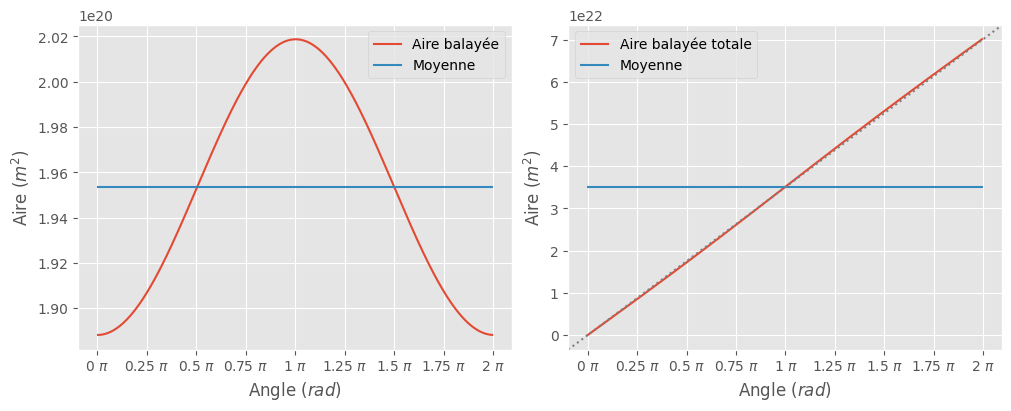

In [11]:
A_balayee_TS, A_balayee_TS_total = A_balayee_MS(x_T_of_theta, y_T_of_theta)
plot_aire_balayee(angle_linear, A_balayee_TS, A_balayee_TS_total)

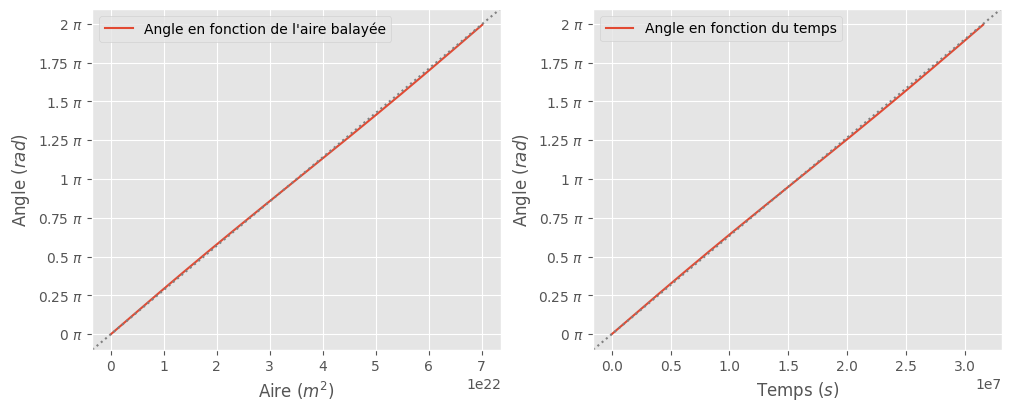

In [12]:
time_T, time_T_of_angle, angle_T_of_time = get_angle_of_time(T_T, A_balayee_TS_total, angle_linear)
plot_reciprocal_area(angle_linear, A_balayee_TS_total, time_T_of_angle)

In [13]:
x_T_of_time, y_T_of_time = get_position_of_time(angle_T_of_time, P_T, a_T, b_T)
anim = visualize_orbit(x_T_of_time, y_T_of_time, a_T, b_T, P_T, A_T, "yellow", "blue")
HTML(anim.to_html5_video())

### Trajectoire de la Lune dans le référentiel géocentrique

In [14]:
x_L_of_theta = P_L-a_L + a_L*np.cos(angle_linear)
y_L_of_theta = b_L * np.sin(angle_linear)

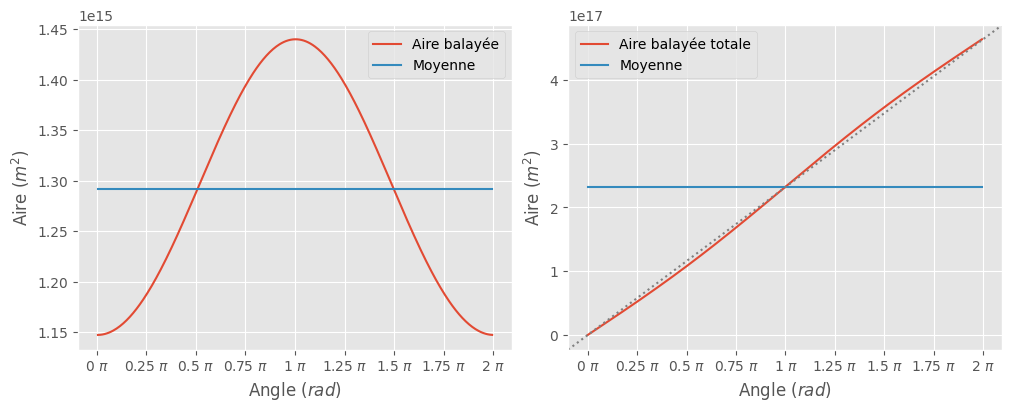

In [15]:
A_balayee_LS, A_balayee_LS_total = A_balayee_MS(x_L_of_theta, y_L_of_theta)
plot_aire_balayee(angle_linear, A_balayee_LS, A_balayee_LS_total)

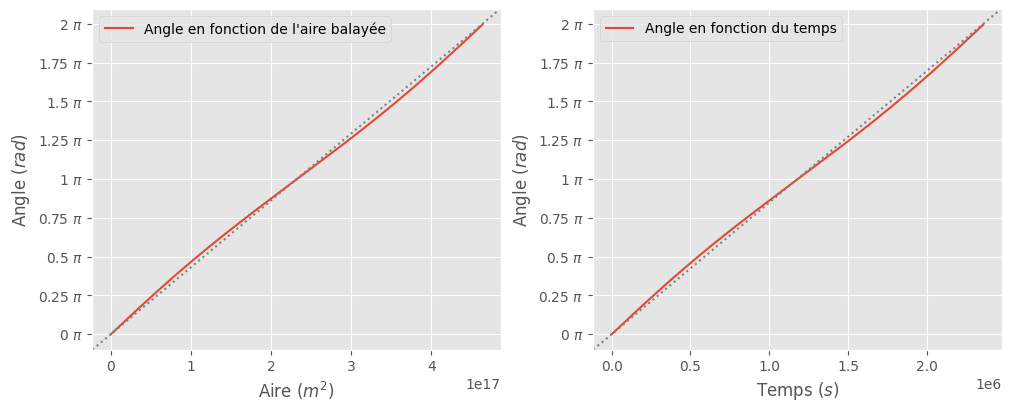

In [16]:
time_L, time_L_of_angle, angle_L_of_time = get_angle_of_time(T_L, A_balayee_LS_total, angle_linear)
plot_reciprocal_area(angle_linear, A_balayee_LS_total, time_L_of_angle)

In [17]:
x_L_of_time, y_L_of_time = get_position_of_time(angle_L_of_time, P_L, a_L, b_L)
anim = visualize_orbit(x_L_of_time, y_L_of_time, a_L, b_L, P_L, A_L, "blue", "red")
HTML(anim.to_html5_video())

## Visualisation des orbites dans le référentiel héliocentrique

In [24]:
plt.close()
    
fig, ax = plt.subplots()
ax.set(xlim=(-2*A_L + x_T_of_time[0], 2*P_L + x_T_of_time[0]), ylim=(-2*A_L + y_T_of_time[0], 2*A_L + y_T_of_time[0]), aspect="equal")

# Earth
earth_trajectory = Ellipse((P_T-a_T, 0), 2*a_T, 2*b_T, edgecolor="blue", facecolor="none")
ax.add_artist(earth_trajectory)

earth = Circle((x_T_of_time[0], y_T_of_time[0]), a_L/10, facecolor="blue")
ax.add_artist(earth)

def animate(frame):
    earth.center = (x_T_of_time[frame], y_T_of_time[frame])
    ax.set(xlim=(-2*A_L + x_T_of_time[frame], 2*P_L + x_T_of_time[frame]), ylim=(-2*A_L + y_T_of_time[frame], 2*A_L + y_T_of_time[frame]), aspect="equal")
    return (earth)

plt.close()

anim = FuncAnimation(fig, animate, frames=x_T_of_time.size, interval=40)
HTML(anim.to_html5_video())